In [82]:
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

#### Edge Detection

In [83]:
im = np.zeros([256, 256])
im[64:-64, 64:-64] = 1
im

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
indices_of_ones = np.nonzero(im)
indices_of_ones

(array([ 64,  64,  64, ..., 191, 191, 191], dtype=int64),
 array([ 64,  65,  66, ..., 189, 190, 191], dtype=int64))

In [85]:
im = ndi.rotate(im, 15, mode='constant')

In [86]:
im = ndi.gaussian_filter(im, 8)

#### Use a Sobel operator 

In [87]:
sx = ndi.sobel(im, axis=0, mode='constant')
sy = ndi.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)
sob

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Segmentation

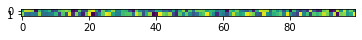

In [88]:
n = 10
l = 256
im = np.zeros([l, l])
np.random.seed(20)
points = l * np.random.random((2, n**2))
plt.imshow(points)

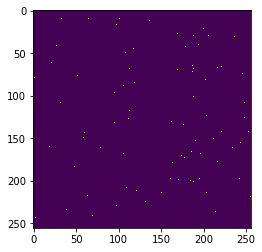

In [89]:
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndi.gaussian_filter(im, sigma=1/(4.*n))

plt.imshow(im)

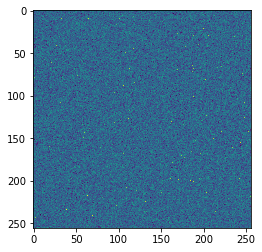

In [90]:
mask = (im > im.mean()).astype(np.float)
mask += 0.1 * im
img = mask + 0.2*np.random.randn(*mask.shape)
plt.imshow(img)

(array([38.,  4.,  2.,  2.,  2.,  2.,  2.,  1.,  3.,  4.]),
 array([   0. ,  514.9, 1029.8, 1544.7, 2059.6, 2574.5, 3089.4, 3604.3,
        4119.2, 4634.1, 5149. ]),
 <a list of 10 Patch objects>)

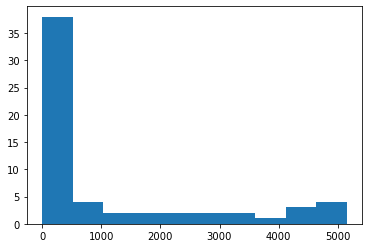

In [91]:
hist, bin_edges = np.histogram(img, bins=60)
plt.hist(hist)

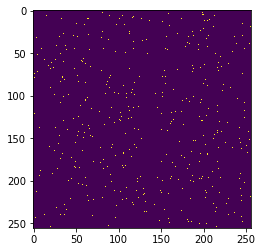

In [92]:
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
binary_img = img > 0.5
binary_img
plt.imshow(binary_img)

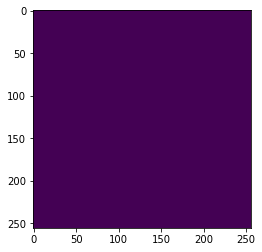

In [93]:
open_img = ndi.binary_opening(binary_img)
open_img
plt.imshow(open_img)

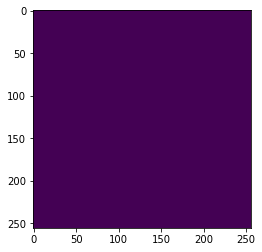

In [94]:
close_img = ndi.binary_closing(open_img)
close_img
plt.imshow(close_img)